In [6]:
import numpy as np
import os
import torch
import pandas as pd
from PIL import Image
import json

In [7]:
train_df = pd.read_csv("training_clean_dataset.csv")
train_df

,Unnamed: 0,breed,age,gender,region,species,lesions,identifier,image_name,image_full_path,annotations,lesion_folder_name,animal
0,0,포메라니안,4,M,B,D,A1,피부질환,IMG_D_A1_000001.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A1_구진_플라크,반려견
1,1,말티즈,5,M,B,D,A1,피부질환,IMG_D_A1_000002.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A1_구진_플라크,반려견
2,2,말티즈,6,F,L,D,A1,피부질환,IMG_D_A1_000003.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A1_구진_플라크,반려견
3,3,푸들,3,F,L,D,A1,피부질환,IMG_D_A1_000004.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A1_구진_플라크,반려견
4,4,몽그렐,9,M,B,D,A1,피부질환,IMG_D_A1_000005.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A1_구진_플라크,반려견
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55869,55869,코리안숏헤어,11,M,B,C,A2,피부질환,IMG_C_A2_202699.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A2_비듬_각질_상피성잔고리,반려묘
55870,55870,페르시안,10,M,L,C,A2,피부질환,IMG_C_A2_202700.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A2_비듬_각질_상피성잔고리,반려묘
55871,55871,페르시안,10,M,H,C,A2,피부질환,IMG_C_A2_202701.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A2_비듬_각질_상피성잔고리,반려묘
55872,55872,페르시안,10,M,B,C,A2,피부질환,IMG_C_A2_202702.jpg,data/152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링...,"[{'polygon': {'color': '#1beaac', 'location': ...",A2_비듬_각질_상피성잔고리,반려묘


In [14]:
classes = pd.unique(train_df['lesions'])
class2idx = {v:i for i,v in enumerate(classes)}
categories = [{"id": i, "name": classes[i]} for i in range(len(classes))]

box_count = 0
images = []
annotations = []
for i in range(len(train_df)):
    #Create COCO annotation for each image
    image = {}
    image['id'] = i
    image['width'] = 1920
    image['height'] = 1080
    image['file_name'] = train_df.loc[i, 'image_full_path'][5:]
    images.append(image)
    ann_obj = json.loads(train_df.loc[i, 'annotations'].replace("\'", "\""))
    for ann in ann_obj:
        if 'box' in ann:
            annotation = {}
            annotation['id'] = box_count
            annotation['image_id'] = i
            annotation['category_id'] = class2idx[train_df.loc[i, 'lesions']]
            loc = ann['box']['location'][0]
            annotation['iscrowd'] = 0 
            annotation['bbox'] = [loc['x'], loc['y'], loc['width'], loc['height']]
            annotation['area'] = loc['width']*loc['height']
            annotation['segmentation'] = []
            annotations.append(annotation)
            box_count += 1
            

    #break
    #print(ann_obj[0])
    #print(train_df.loc[i, 'annotations'])
    
    #print(Image.open(os.path.join('data', image['file_name'])).size)

    
    #break
json.dump({"images": images, "annotations": annotations, "categories": categories}, open("train_annotation_coco.json", "w"))

In [13]:
valid_df = pd.read_csv("validation_dataset.csv")
classes = pd.unique(valid_df['lesions'])
class2idx = {v:i for i,v in enumerate(classes)}
categories = [{"id": i, "name": classes[i]} for i in range(len(classes))]
box_count = 0
images = []
annotations = []
for i in range(len(valid_df)):
    #Create COCO annotation for each image
    image = {}
    image['id'] = i
    image['width'] = 1920
    image['height'] = 1080
    image['file_name'] = valid_df.loc[i, 'image_full_path'][5:]
    images.append(image)
    ann_obj = json.loads(valid_df.loc[i, 'annotations'].replace("\'", "\""))
    for ann in ann_obj:
        if 'box' in ann:
            annotation = {}
            annotation['id'] = box_count
            annotation['image_id'] = i
            annotation['category_id'] = class2idx[valid_df.loc[i, 'lesions']]
            loc = ann['box']['location'][0]
            annotation['bbox'] = [loc['x'], loc['y'], loc['width'], loc['height']]
            annotation['area'] = loc['width']*loc['height']
            annotation['segmentation'] = []
            annotation['iscrowd'] = 0
            annotations.append(annotation)
            box_count += 1
            

    #break
    #print(ann_obj[0])
    #print(train_df.loc[i, 'annotations'])
    
    #print(Image.open(os.path.join('data', image['file_name'])).size)

    
    #break
json.dump({"images": images, "annotations": annotations, "categories": categories}, open("valid_annotation_coco.json", "w"))

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
%matplotlib inline
coco_annotation_file_path = "train_annotation_coco.json"

coco_annotation = COCO(annotation_file=coco_annotation_file_path)

# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = ""
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

# Category Name -> Category ID.
query_name = cat_names[2]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

# Pick one image.
img_id = img_ids[10]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]


img_url = ""
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

# # Use URL to load image.
im = Image.open(img_file_name)

# # Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
plt.show()
#plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
#Plot segmentation and bounding box.
plt.imshow(np.asarray(im))
coco_annotation.showAnns(anns, draw_bbox=True)
plt.show()
#plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
Number of Unique Categories: 6
Category IDs:
[0, 1, 2, 3, 4, 5]
Categories Names:
['A1', 'A2', 'A3', 'A4', 'A5', 'A6']
Category ID -> Category Name:
Category ID: 0, Category Name: A1, Supercategory: 
Category Name -> ID:
Category Name: A3, Category ID: 2
Number of Images Containing A3: 10527
Image ID: 19363, File Name: 152.반려동물 피부질환 데이터/01.데이터/1.Training/2_라벨링데이터/TL01/반려견/피부/일반카메라/유증상/A3_태선화_과다색소침착/IMG_D_A3_004691.jpg, Image URL: 
Annotations for Image ID 19363:
[{'id': 19505, 'image_id': 19363, 'category_id': 2, 'bbox': [497, 222, 233, 117], 'is_crowd': 0, 'area': 27261, 'segmentation': []}]


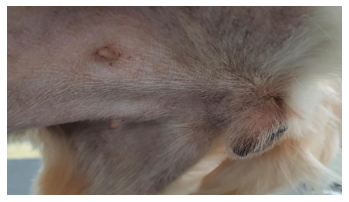

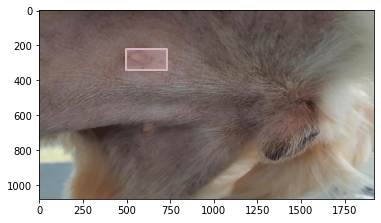